# EE16A Homework 13

## Question 1: Recipe Reconnaissance

In [199]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sys

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gamma', 'rec', 'display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Note that for the following sections, we use the following labels for the unknown variables:

#### Decadent Dwight
   * D_e = eggs/cookie
   * D_b = (grams butter)/cookie
   * D_s = (grams sugar)/cookie
    
#### Heavenly Hearst
   * H_e = eggs/cookie
   * H_b = (grams butter)/cookie
   * H_s = (grams sugar)/cookie
   
**Note**: in the following sections we only solve for 4 of the unknowns with least squares, as we are given exact values for 2 unknowns.

### Part (b)

In [268]:
print('4 unknowns (set H_b and D_b = 10 g)')
# x_ls = [D_e, H_e, D_s, H_s]

#### Your Task: fill in the correct values for A and b.
A = np.array([
    [40, 50, 0, 0],
    [0, 0, 280, 350],
    [1/6, 0, 1/200, 0],
    [0, 1/6, 0, 1/200],
    [0, 0, 0, 1]
])
b = np.array([12, 5000, 0.1, 0.1, 10])

x_ls, res, _, _ = numpy.linalg.lstsq(A,b, rcond=None)
np.set_printoptions(precision=4, suppress=True)
print(A)
print(b)
print('D_e, H_e, D_s, H_s\t=\t%s' % x_ls)
print('Sum Squared Residuals\t=\t%f' % res)

average_error = res / 5
print('Average error for data points\t=\t%f' % average_error)

4 unknowns (set H_b and D_b = 10 g)
[[ 40.      50.       0.       0.    ]
 [  0.       0.     280.     350.    ]
 [  0.1667   0.       0.005    0.    ]
 [  0.       0.1667   0.       0.005 ]
 [  0.       0.       0.       1.    ]]
[  12.  5000.     0.1    0.1   10. ]
D_e, H_e, D_s, H_s	=	[ 0.2386  0.0491  5.3571 10.    ]
Sum Squared Residuals	=	0.002867
Average error for data points	=	0.000573


### Part (c)

In [269]:
print('4 unknowns (set H_b and D_b = 10 g)')
# x_ls = [D_e, H_e, D_s, H_s]

#### Your Task: fill in the correct values for A and b.
A = np.array([
    [40, 50, 0, 0],
    [0, 0, 280, 350],
    [1/6, 0, 1/200, 0],
    [0, 1/6, 0, 1/200],
    [0, 0, 0, 1],
    [50, 0, 1, 0],
    [0, 50, 0, 1]
])
b = np.array([12, 5000, 0.1, 0.1, 10, 15, 14])

x_ls, res, _, _ = numpy.linalg.lstsq(A,b, rcond=None)
np.set_printoptions(precision=4, suppress=True)
print(A)
print(b)
print('D_e, H_e, D_s, H_s\t=\t%s' % x_ls)
print('Sum Squared Residuals\t=\t%f' % res)

average_error = res / 7
print('Average error for data points\t=\t%f' % average_error)

4 unknowns (set H_b and D_b = 10 g)
[[ 40.      50.       0.       0.    ]
 [  0.       0.     280.     350.    ]
 [  0.1667   0.       0.005    0.    ]
 [  0.       0.1667   0.       0.005 ]
 [  0.       0.       0.       1.    ]
 [ 50.       0.       1.       0.    ]
 [  0.      50.       0.       1.    ]]
[  12.  5000.     0.1    0.1   10.    15.    14. ]
D_e, H_e, D_s, H_s	=	[ 0.1946  0.0822  5.3572 10.    ]
Sum Squared Residuals	=	0.033903
Average error for data points	=	0.004843


## Question 3: Noise Cancelling Headphones

In [202]:
%matplotlib inline

import numpy as np
from matplotlib.pyplot import plot
from scipy.io import wavfile

from audio_support import wavPlayer
from audio_support import loadSounds
from audio_support import recordAmbientNoise

### Part c)
In the following cell, implement the least squares solution to 
$$min_{\vec x} \| A \vec x - \vec b \|$$

In [203]:
def doLeastSquares(A,b):
    # BEGIN
    At = np.transpose(A)
    AtA = np.dot(At, A)
    inv = np.linalg.inv(AtA)
    last_step = np.dot(inv, At)
    x = np.dot(last_step, b)
    # END
    return x;

### Part d)
Use your least squares solution to find the gamma that minimizes the effect of noise given:

$$\vec n = \begin{bmatrix} 0.10\\ 0.37\\-0.45\\0.068\\0.036 \end{bmatrix};
	\vec r_A = \begin{bmatrix} 0\\ 0.11\\-0.31\\-0.012\\-0.018 \end{bmatrix};
	\vec r_B = \begin{bmatrix} 0\\ 0.22\\-0.20\\0.080\\0.056 \end{bmatrix};
	\vec r_C = \begin{bmatrix} 0\\ 0.37\\-0.44\\0.065\\0.038 \end{bmatrix}$$


In [204]:
n1 = 0.10;
n2 = 0.37;
n3 = -0.45;
n4 = 0.068;
n5 = 0.036;

a1 = 0;
a2 = 0.11;
a3 = -0.31;
a4 = -0.012;
a5 = -0.018;

b1 = 0;
b2 = 0.22;
b3 = -0.20;
b4 = 0.080;
b5 = 0.056;

c1 = 0;
c2 = 0.37;
c3 = -0.44;
c4 = 0.065;
c5 = 0.038;

# BEGIN

A = np.array([
    [a1, b1, c1],
    [a2, b2, c2],
    [a3, b3, c3],
    [a4, b4, c4],
    [a5, b5, c5]
])
b = np.array([
    [n1],
    [n2],
    [n3],
    [n4],
    [n5]
]).dot(-1)

gamma = doLeastSquares(A, b)

# END
print(gamma)

[[-0.0883]
 [-0.093 ]
 [-0.9184]]


<font color="red">Report the results for your gamma-vector.

### Part e)
First, we'll load the sounds from the included .wav files.

In [205]:
[music_Fs, music_y, noise1_y, noise1_Fs, noise2_y, noise2_Fs] = loadSounds();

In [206]:
noise1_y

array([ 0.1075,  0.3667, -0.4518, ...,  0.0679,  0.0358,  0.0766])

We can use the following function to listen to our signals throughout this notebook. 

<font color="red">Listen to each of the loaded sounds (`music_y`, `noise1_y`, and `noise2_y`). What do you hear?

In [207]:
wavPlayer(music_y, music_Fs)
wavPlayer(noise1_y, music_Fs)
wavPlayer(noise2_y, music_Fs)

Add the first noise to the signal and listen to the result.

In [208]:
noisyMusic = music_y + noise1_y;
wavPlayer(noisyMusic, music_Fs)

<font color="red">Add the second noise to the signal and listen to the result.

In [209]:
# BEGIN
noisyMusic = music_y + noise2_y;
wavPlayer(noisyMusic, music_Fs)
# END

### Part (f)
Next, we will simulate the recording of `noise1` using a simulated microphone array.

In [210]:
numberOfMicrophones = 3;
R = recordAmbientNoise(noise1_y,noise1_Fs,numberOfMicrophones);


<font color="red">In the cell below, calculate the gamma-vector using the least squares approach (you should calculate `gamma` from `R` and `noise1_y`). 

In [211]:
# BEGIN
gamma = 
# END

SyntaxError: invalid syntax (<ipython-input-211-1234c23eda79>, line 2)

<font color="red">In the cell below, create the noise cancellation signal by multiplying `R` and `gamma`. Add the result to `music_y` (with the right sign) to get `signalFromSpeaker`.

In [ ]:
# BEGIN
'...'
signalFromSpeaker = 
# END

### Part (g)
Generate the signal at the listener's ear by adding the speaker signal (`signalFromSpeaker`) to the original noise signal (`noise1_y`).

In [ ]:
# BEGIN
signalAtEar =
# END

Listen to the noisy and noise-cancelled signal.

In [ ]:
wavPlayer(noisyMusic, music_Fs)
wavPlayer(signalAtEar, music_Fs)

<font color="red">What difference can you hear between these signals?

### Part (h)
Now, we'll see how well this gamma works for other noise. 

We will run through the simulation again, but this time, we will just use the gamma from before instead of going through a training step.

In [ ]:
noisyMusic_2 = music_y + noise2_y;
R_2 = recordAmbientNoise(noise2_y,noise2_Fs,numberOfMicrophones);
# BEGIN
'...'
signalFromSpeaker_2 = '...' 
signalAtEar_2 = '...'
# END 

wavPlayer(noisyMusic_2, music_Fs)
wavPlayer(signalAtEar_2, music_Fs)

<font color="red"> What do you hear in the noise-cancelled signal?

## Question 4: Image Analysis

In [251]:
def plot_circle2(a, d, e):
    """
    This plots the true ellipse along with the circle
    that you plot.
    
    You can comment out the line that starts with `plt.title`
    because this makes assumptions regarding the title of your plot.
    """
    is_circle = d**2 + e**2 - 4*a > 0
    assert is_circle, "Not a circle"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 2
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a*(x**2 + y**2) + d*x + e*y
    f2 = lambda x,y: 3*x*x + .5*x*y + 4*y*y -5*x -.6*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors='r')
    c2 = plt.contour(x, y, f2(x,y), [1], colors='b')
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
#     plt.title(r'${:.2f}(x^2 + y^2) {:+.2f}x {:+.2f}y$'.format(a,d,e))
    
    lines = (c1.collections[0], c2.collections[0])
    labels = ('Least Squares', 'True Cell Boundary')
    plt.legend(lines, labels, loc='upper right')

In [252]:
def plot_ellipse2(a, b, c, d, e):
    """
    This plots the true ellipse along with the ellipse
    that you plot.
    
    You can comment out the line that starts with `plt.title`
    because this makes assumptions regarding the title of your plot.
    """
    is_ellipse = b**2 - 4*a*c < 0
    assert is_ellipse, "Not an ellipse"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 2
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a*x**2 + b*x*y + c*y**2 + d*x + e*y
    f2 = lambda x,y: 3*x*x + .5*x*y + 4*y*y -5*x -.6*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors='r')
    c2 = plt.contour(x, y, f2(x,y), [1], colors='b')
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(r'${:.2f}x^2 {:+.2f}xy {:+.2f}y^2 {:+.2f}x {:+.2f}y$'.format(a,b,c,d,e))
    
    lines = (c1.collections[0], c2.collections[0])
    labels = ('Least Squares', 'True Cell Boundary')
    plt.legend(lines, labels, loc='upper right')

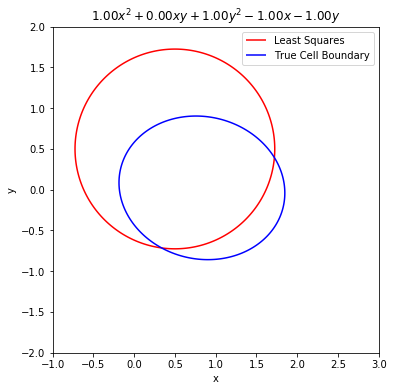

In [253]:
# Here is an example of plot_ellipse.
# This plots (x-1)**2 + (y-1)**2 = 1, 
# which is a circle centered at (1,1). 

plt.figure(figsize=(6,6))
plot_ellipse2(1, 0, 1, -1, -1)

### Part (c)
You may find [plt.scatter](http://matplotlib.org/api/pyplot_api.html) useful for plotting the points.

x_circle = [ 4.8731 -7.8929 -0.2265] 

Average error: 0.13749056224314807


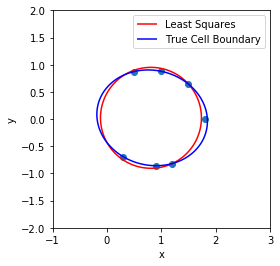

In [262]:
xy = np.array([[0.3, -0.69],
               [0.5, 0.87],
               [0.9, -0.86],
               [1, 0.88],
               [1.2, -0.82],
               [1.5, .64],
               [1.8, 0]])

# YOUR CODE HERE
N = np.size(xy, axis=0)

A_c = []
for i in range(N):
    x, y = xy[i]
    A_c.append([x**2 + y**2, x, y])

b_c = np.array([1] * N)

x_c = doLeastSquares(A_c, b_c)
print('x_circle =', x_c, '\n')

e_c = np.subtract(b_c, np.dot(A_c, x_c))
print('Average error:', np.linalg.norm(e_c) / N)

# Graphing
plt.scatter(xy[:, :1], xy[:, 1:])
plot_circle2(x_c[0], x_c[1], x_c[2])

### Part (d)

x_ellipse = [ 4.1038  0.4871  4.9394 -6.8503 -0.6226] 

Average error: 0.012853829087236082


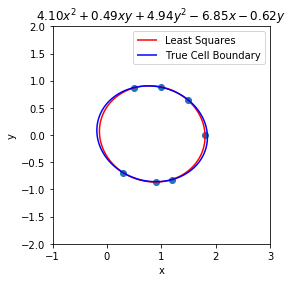

In [265]:
# YOUR CODE HERE
N = np.size(xy, axis=0)

A_e = []
for i in range(N):
    x, y = xy[i]
    A_e.append([x**2, x*y, y**2, x, y])

b_e = np.array([1] * N)

x_e = doLeastSquares(A_e, b_e)
print('x_ellipse =', x_e, '\n')

e_e = np.subtract(b_e, np.dot(A_e, x_e))
print('Average error:', np.linalg.norm(e_e) / N)

# Graphing
plt.scatter(xy[:, :1], xy[:, 1:])
plot_ellipse2(x_e[0], x_e[1], x_e[2], x_e[3], x_e[4])

## Question 5: Pollster

In [212]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io as sio
%matplotlib inline

data = sio.loadmat('data.mat')

# All data examples/labels (training & testing)
examples = data['data']
labels = data['labels'][0,:]

N_examples = examples.shape[0]
N_features = examples.shape[1]

# Least Squares
doLeastSquares = lambda A,b : np.linalg.lstsq(A,b,rcond=0.)[0]

### part (b)

The total prediction error is the length of the error vector, $\|\vec{b} - \mathbf{A}\vec{\hat{x}}\|$.

In [213]:
# Setup A,b for only the training examples
K = 90
A = examples[:K, :]
b = labels[:K]

# Solve Linear Least Squares (doLeastSquares)
x_hat = doLeastSquares(A, b)
print('x =', x_hat, '\n')

# Evaluate training prediction error
pred_training_error = np.linalg.norm(np.subtract(b, np.dot(A, x_hat)))
print('Training Error:', pred_training_error)

# Evaluate testing prediction error
A_test = examples[K:,:]
b_test = labels[K:]

pred_testing_error = np.linalg.norm(np.subtract(b_test, np.dot(A_test, x_hat)))
print('Testing Error:', pred_testing_error)

x = [-0.1805 -0.0688  0.0761 -0.0986  0.0907  0.0558  0.2183  0.1526 -0.0483
 -0.2307] 

Training Error: 0.863316443561086
Testing Error: 0.3203415321831521


### part (d)

Compute the eigenvalues of $\mathbf{A}^T\mathbf{A}$.

Eigenvalues: [526.1331 377.138    3.075    3.8993   8.4823   7.657    4.8908   5.4385
   6.2888   6.8492]


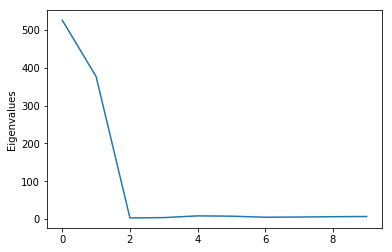

In [214]:
# YOUR CODE HERE
AtA = np.dot(A.transpose(), A)
val, vec = np.linalg.eig(AtA)
print('Eigenvalues:', val)

plt.ylabel("Eigenvalues");
plt.plot(val);

### part (e)

Create the augmented matrix $\tilde{\mathbf{A}}$ and the augmented vector $\vec{\tilde{b}}$. Fill in the ... to complete the {\it np.concatenate} statements.

In [215]:
gamma = 1
gammaI = np.sqrt(gamma) * np.eye(N_features)
zeroVec = np.zeros(N_features)

# augmented A matrix (complete statement)
augA = np.concatenate((A, gammaI),axis=0)
print('Old A dimensions:',A.shape)
print('New A dimensions:',augA.shape)

# augmented b vector (complete statement)
augb = np.concatenate((b, zeroVec),axis=0)
print('Old b dimensions:',b.shape)
print('New b dimensions:',augb.shape)

Old A dimensions: (90, 10)
New A dimensions: (100, 10)
Old b dimensions: (90,)
New b dimensions: (100,)


### part (h) 

Compute the eigenvalues of $\mathbf{A}^T\mathbf{A} + \gamma \mathbf{I}$ for each $\gamma$ in the list. Plot them on the same axis.

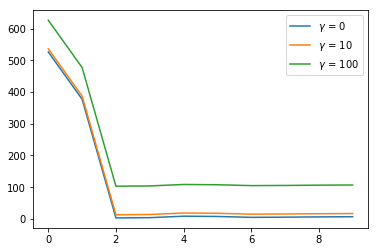

In [216]:
gammas = [0, 10, 100]

AtA = np.dot(A.transpose(), A)

for g in gammas:
    gI = np.dot(g, np.eye(10))
    val, _ = np.linalg.eig(AtA + gI)
    plt.plot(val, label='$\gamma$ = ' + str(g))
    
plt.legend();

### part (i)

For each $\gamma$ in the list, recreate the augmented A matrix, compute the modified least squares solution by calling the function doLeastSquares, and for each solution compute its corresponding total testing prediction error.

(10,)
Optimal gamma:  9.326033468832199
Achieved Total Prediction Error:  0.30650228118716716


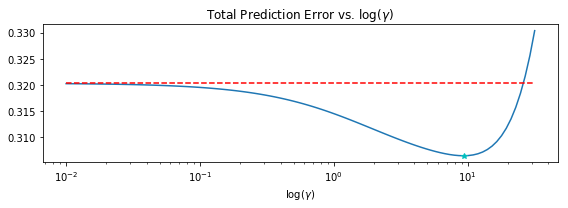

In [217]:
N_gamma = 100
gammaList = np.logspace(-2,1.5,N_gamma)
reg_total_testing_pred_error = np.zeros(N_gamma)

K = 90
A_testing = examples[K:,:]
b_testing = labels[K:]
print(b_testing.shape)

for ii in range(N_gamma):
    # create the augmented A matrix (similar to in part e)
    sqrtgammaI = np.sqrt(gammaList[ii])*np.eye(N_features)
    augA = np.concatenate((A, sqrtgammaI),axis=0)
    
    # Call lls to find linear least squares solution
    x = doLeastSquares(augA, augb)
    
    # Evaluate testing error and store in list reg_total_testing_pred_error
    error = np.linalg.norm(np.subtract(b_testing, np.dot(A_testing, x)))
    reg_total_testing_pred_error[ii] = error

    
# Do not edits this
plt.figure(figsize=(8,3))
plt.semilogx(gammaList,reg_total_testing_pred_error)
plt.semilogx(gammaList,pred_testing_error*np.ones(N_gamma),'r--')
plt.xlabel('log($\gamma$)')
plt.title('Total Prediction Error vs. log($\gamma$)')
plt.tight_layout()

gamma_reglls_opt = gammaList[np.argmin(reg_total_testing_pred_error)]
testing_error_reglls_opt = np.min(reg_total_testing_pred_error)
print('Optimal gamma: ', gamma_reglls_opt)
print('Achieved Total Prediction Error: ', testing_error_reglls_opt)

plt.semilogx(gamma_reglls_opt, testing_error_reglls_opt, 'c*')

## Question 7: Sparse Imaging

This example generates a sparse signal and tries to recover it using the Orthogonal Matching Pursuit algorithm.

In [171]:
# imports
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
from IPython import display
import sys
%matplotlib inline

def randMasks(numMasks, numPixels):
    randNormalMat = np.random.normal(0,1,(numMasks,numPixels))
    # make the columns zero mean and normalize
    for k in range(numPixels):
        # make zero mean
        randNormalMat[:,k] = randNormalMat[:,k] - np.mean(randNormalMat[:,k])
        # normalize to unit norm
        randNormalMat[:,k] = randNormalMat[:,k] / np.linalg.norm(randNormalMat[:,k])
    A = randNormalMat.copy()
    Mask = randNormalMat - np.min(randNormalMat)    
    return Mask,A

def simulate():
    # read the image in grayscale
    I = np.load('helper.npy')
    sp = np.sum(I)
    numMeasurements = 6500
    numPixels = I.size
    Mask, A = randMasks(numMeasurements,numPixels)
    full_signal = I.reshape((numPixels,1))
    measurements = np.dot(Mask,full_signal)
    measurements = measurements - np.mean(measurements)
    return measurements, A    

### Part (a)

In [172]:
measurements, A = simulate()

# THE SETTINGS FOR THE IMAGE - PLEASE DO NOT CHANGE
height = 91
width = 120
sparsity = 476
numPixels = len(A[0])

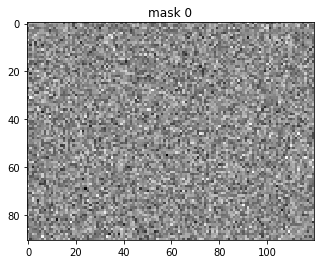

In [173]:
# CHOOSE DIFFERENT MASKS TO PLOT
chosenMaskToDisplay = 0

M0 = A[chosenMaskToDisplay].reshape((height,width))
plt.title('mask %d'%chosenMaskToDisplay)
plt.imshow(M0, cmap=plt.cm.gray, interpolation='nearest');

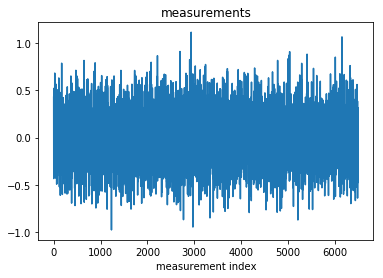

In [174]:
# measurements
plt.title('measurements')
plt.plot(measurements)
plt.xlabel('measurement index')
plt.show()

In [177]:
# OMP algorithm
# THERE ARE MISSING LINES THAT YOU NEED TO FILL
def OMP(imDims, sparsity, measurements, A):
    r = measurements.copy()
    indices = []
    
    # Threshold to check error. If error is below this value, stop.
    THRESHOLD = 0.1
    
    # For iterating to recover all signal
    i = 0
    
    while i < sparsity and np.linalg.norm(r) > THRESHOLD: 
       # Calculate the inner products of r with columns of A
        print('%d - '%i,end="",flush=True)
        simvec = A.T.dot(r)

        # Choose pixel location with highest inner product and add to collection
        # COMPLETE THE LINE BELOW
        best_index = np.argmax(np.abs(simvec))
        indices.append(best_index)

        # Build the matrix made up of selected indices so far
        # COMPLETE THE LINE BELOW
        Atrunc = A[:, indices]

        # Find orthogonal projection of measurements to subspace
        # spanned by recovered codewords
        b = measurements
        # COMPLETE THE LINE BELOW
        xhat = np.linalg.lstsq(Atrunc, b)[0]  

        # Find component orthogonal to subspace to use for next measurement
        # COMPLETE THE LINE BELOW
        r = b - Atrunc.dot(xhat)

        # This is for viewing the recovery process
        if i % 10 == 0 or i == sparsity-1 or np.linalg.norm(r) <= THRESHOLD:
            recovered_signal = np.zeros(numPixels)
            for j, x in zip(indices, xhat):
                recovered_signal[j] = x
            Ihat = recovered_signal.reshape(imDims)
            plt.title('estimated image')
            plt.imshow(Ihat, cmap=plt.cm.gray, interpolation='nearest') 
            display.clear_output(wait=True)
            display.display(plt.gcf())
        
        i = i + 1
        
    display.clear_output(wait=True)

    # Fill in the recovered signal
    recovered_signal = np.zeros(numPixels)
    for i, x in zip(indices, xhat):
        recovered_signal[i] = x
    
    return recovered_signal

### Part (b)

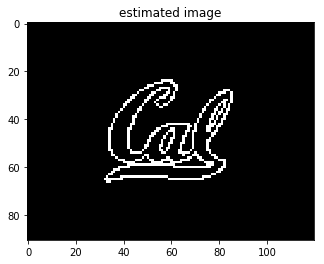

In [178]:
rec = OMP((height,width), sparsity, measurements, A)

### PRACTICE: Part (c)

In [ ]:
# the setting

# file name for the sparse image
fname = 'figures/smiley.png'
# number of measurements to be taken from the sparse image
numMeasurements = 6500
# the sparsity of the image
sparsity = 400

# read the image in black and white
I = misc.imread(fname, flatten=1)
# normalize the image to be between 0 and 1
I = I/np.max(I)

# shape of the image
imageShape = I.shape
# number of pixels in the image
numPixels = I.size

plt.title('input image')
plt.imshow(I, cmap=plt.cm.gray, interpolation='nearest');

In [ ]:
# generate your image masks and the underlying measurement matrix
Mask, A = randMasks(numMeasurements,numPixels)
# vectorize your image
full_signal = I.reshape((numPixels,1))
# get the measurements
measurements = np.dot(Mask,full_signal)
# remove the mean from your measurements
measurements = measurements - np.mean(measurements)

In [ ]:
# measurements
plt.title('measurements')
plt.plot(measurements)
plt.xlabel('measurement index')
plt.show()

In [ ]:
rec = OMP(imageShape, sparsity, measurements, A)